In [1]:
import sipm_position_histograms as sph
import sipm_1d_histograms as soh

In [3]:
import os

path_corners = "/home/smallsat/Desktop/grips-impress/geant4-impress-grips-piggyback/build/data-out/plate_corner_data"

cornerdir = os.listdir(path_corners)


In [4]:
scintillators = ["LYSO", "GAGG"]
surface_finishes = ["RRR", "PPP"]
reflectors = ["ESR", "TEF"]
runs = ["run1", "run2", "run3", "run4"]

dirorder = list()

for scint in scintillators:
    for surf in surface_finishes:
        for ref in reflectors:
            for run in runs:
                name = "40x5x40_"+scint+"_"+surf+"_"+ref+"_Corner_Test-"+run
                for fold in cornerdir:
                    foldname = fold.split("-")[0]+"-"+fold.split("-")[1]
                    if foldname == name:
                        dirorder.append(fold)

print(dirorder)

['40x5x40_LYSO_RRR_ESR_Corner_Test-run1-2023-03-17-16:42:13', '40x5x40_LYSO_RRR_ESR_Corner_Test-run2-2023-03-17-16:42:42', '40x5x40_LYSO_RRR_ESR_Corner_Test-run3-2023-03-17-16:43:11', '40x5x40_LYSO_RRR_ESR_Corner_Test-run4-2023-03-17-16:43:39', '40x5x40_LYSO_RRR_TEF_Corner_Test-run1-2023-03-17-16:38:23', '40x5x40_LYSO_RRR_TEF_Corner_Test-run2-2023-03-17-16:38:52', '40x5x40_LYSO_RRR_TEF_Corner_Test-run3-2023-03-17-16:39:21', '40x5x40_LYSO_RRR_TEF_Corner_Test-run4-2023-03-17-16:39:45', '40x5x40_LYSO_PPP_ESR_Corner_Test-run1-2023-03-20-12:57:46', '40x5x40_LYSO_PPP_ESR_Corner_Test-run2-2023-03-20-12:58:45', '40x5x40_LYSO_PPP_ESR_Corner_Test-run3-2023-03-20-12:59:32', '40x5x40_LYSO_PPP_ESR_Corner_Test-run4-2023-03-20-13:00:29', '40x5x40_LYSO_PPP_TEF_Corner_Test-run1-2023-03-20-12:55:02', '40x5x40_LYSO_PPP_TEF_Corner_Test-run2-2023-03-20-12:55:40', '40x5x40_LYSO_PPP_TEF_Corner_Test-run3-2023-03-20-12:56:19', '40x5x40_LYSO_PPP_TEF_Corner_Test-run4-2023-03-20-12:57:03', '40x5x40_GAGG_RRR_ESR_C

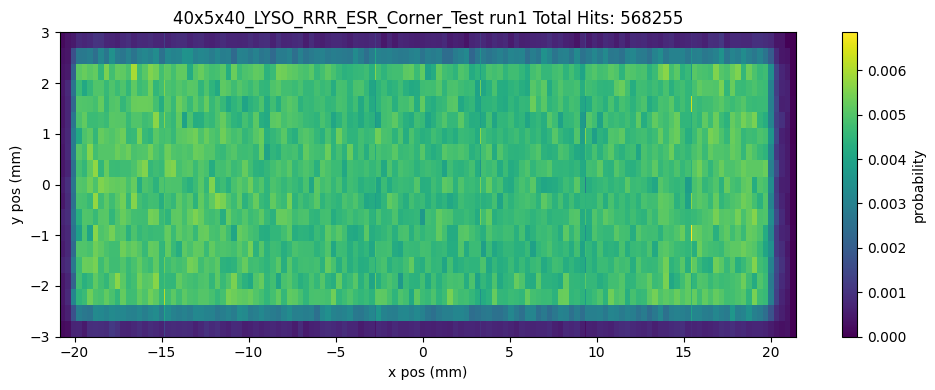

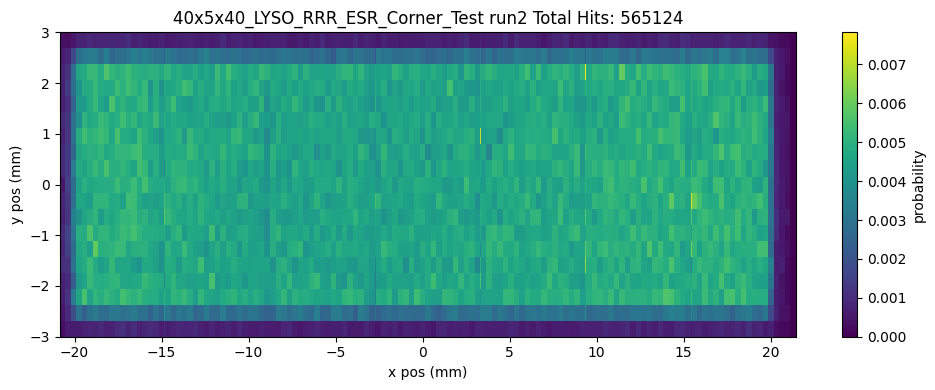

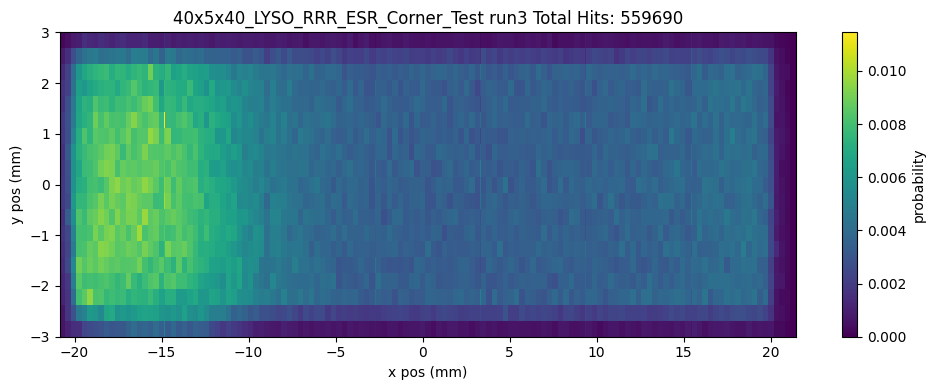

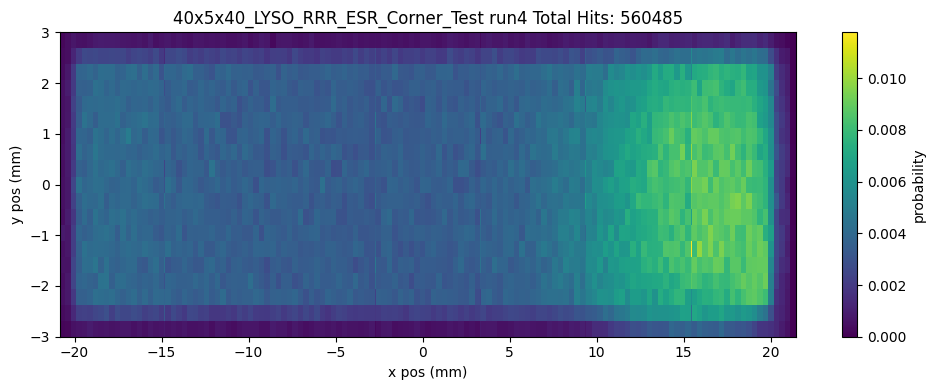

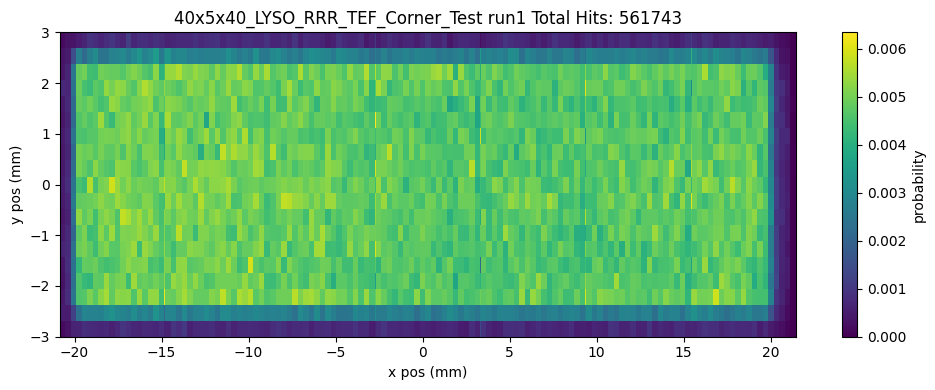

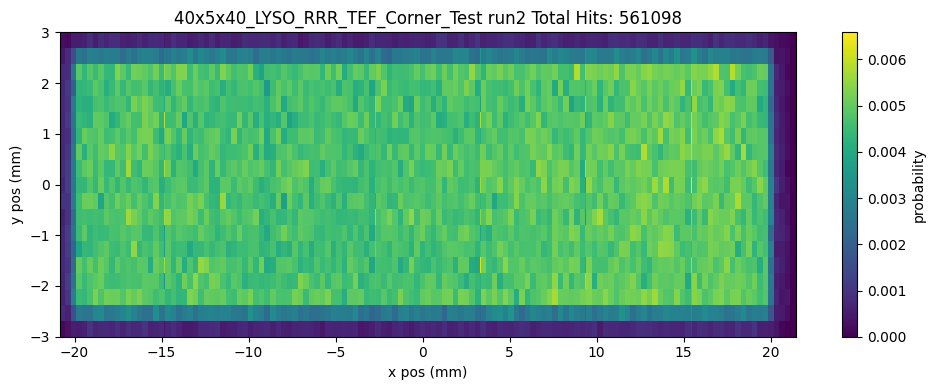

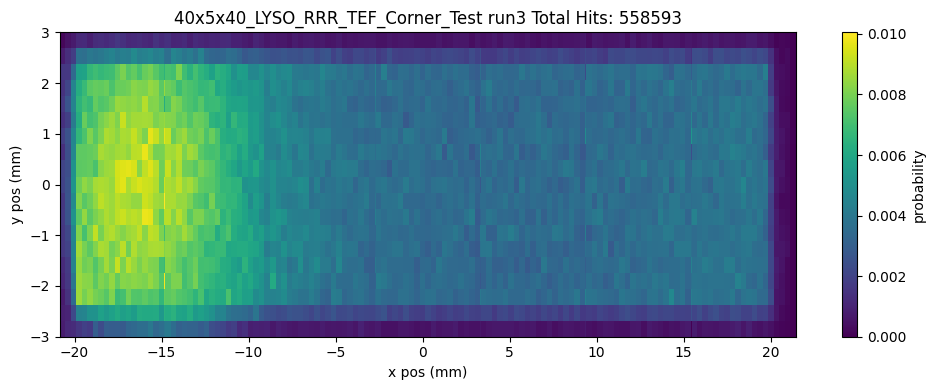

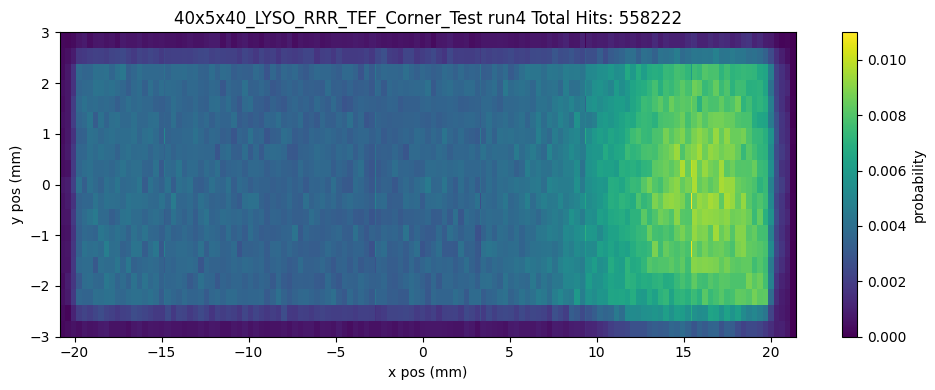

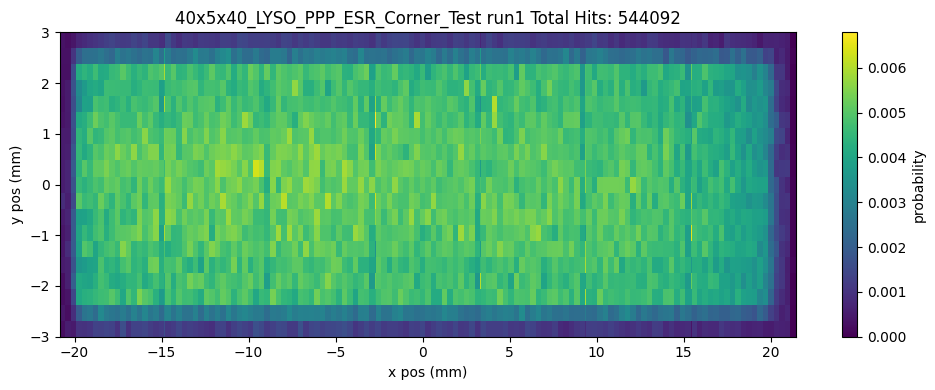

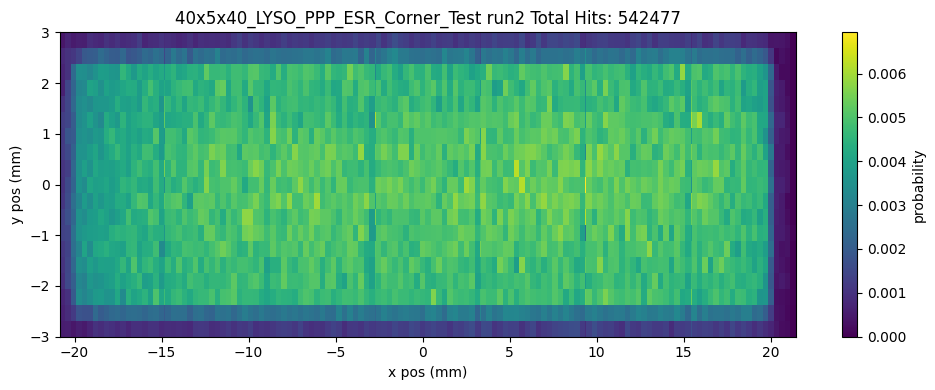

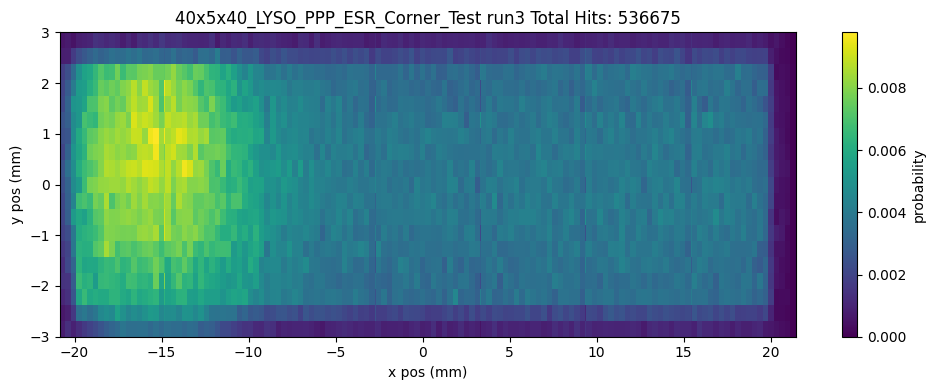

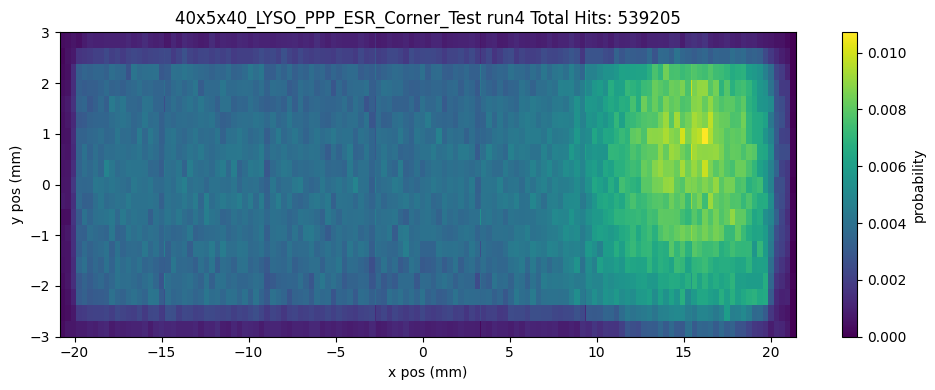

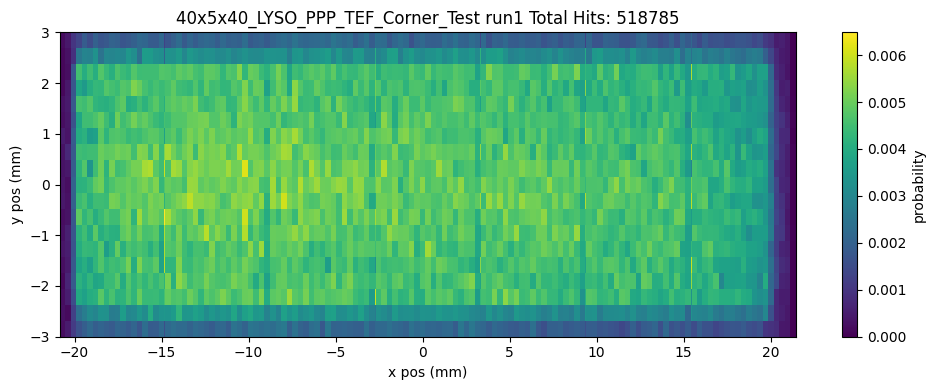

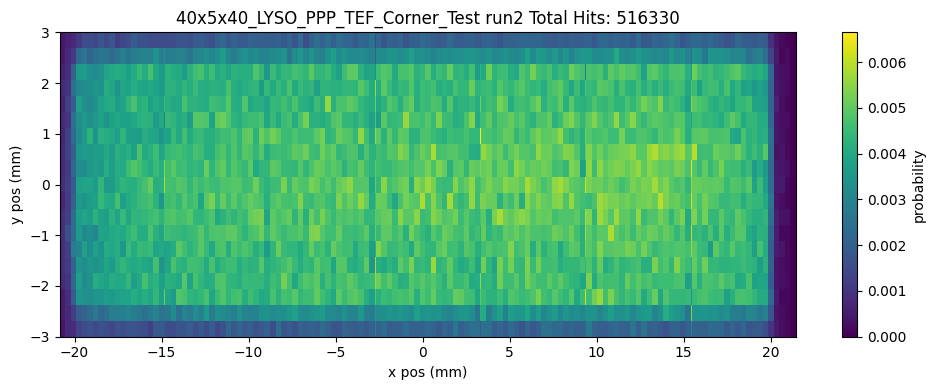

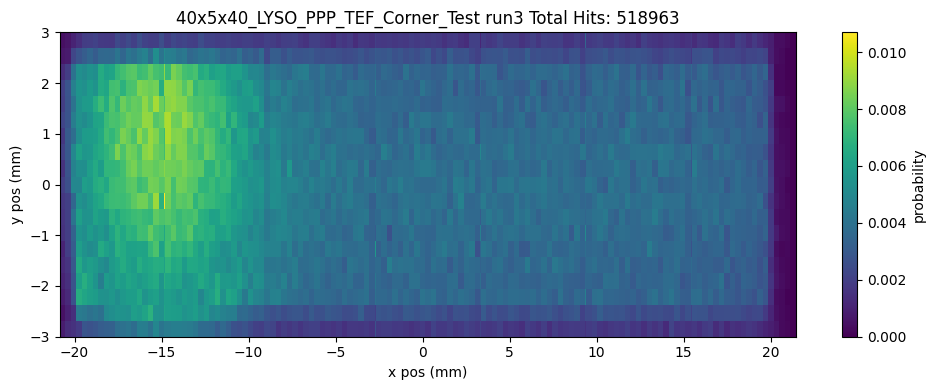

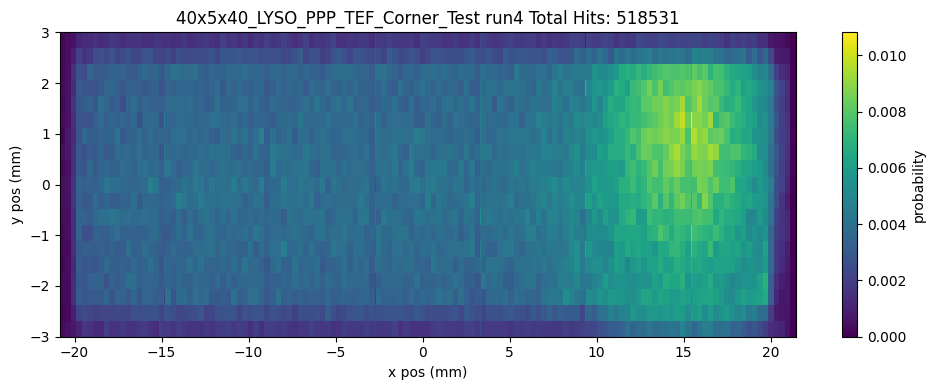

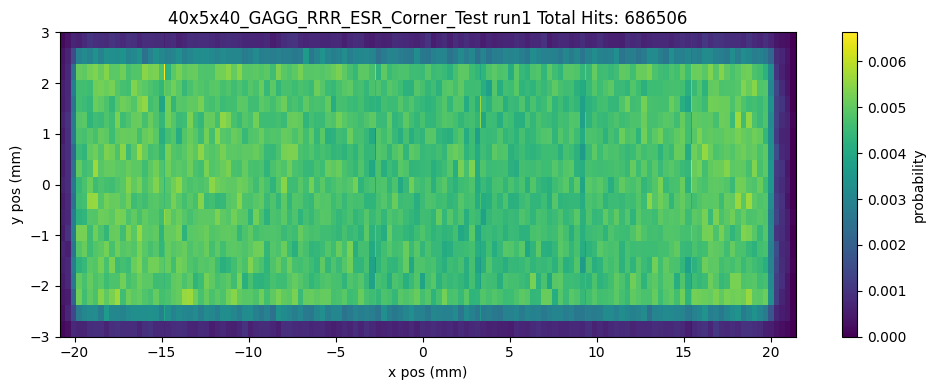

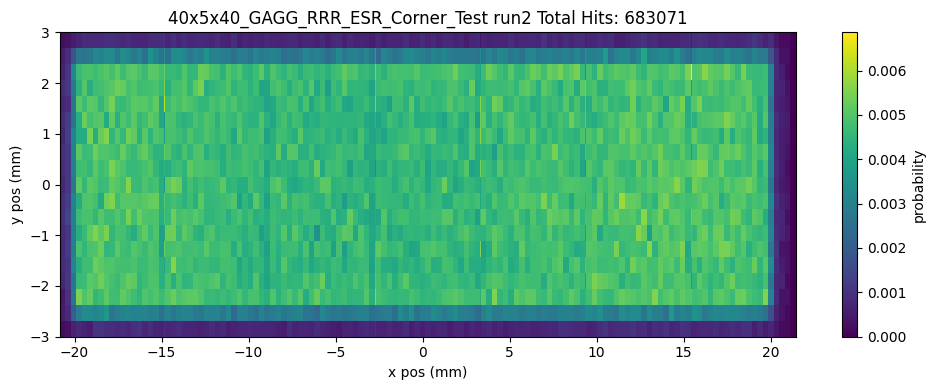

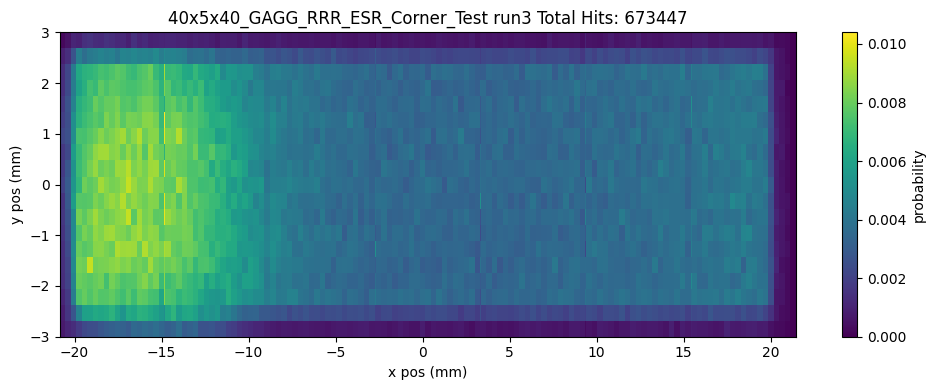

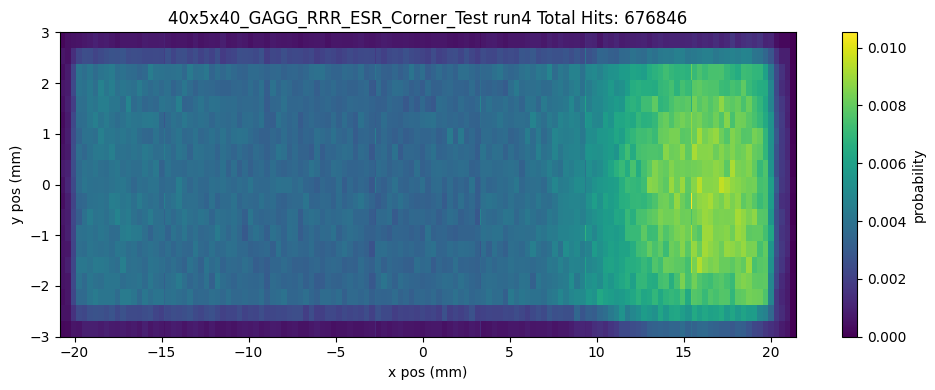

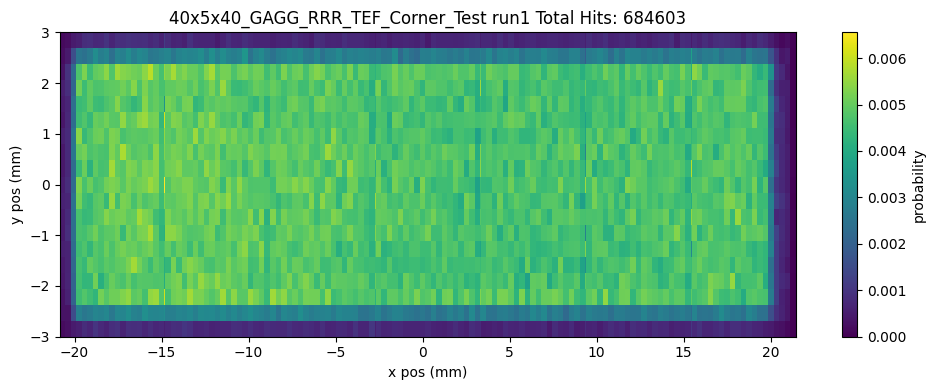

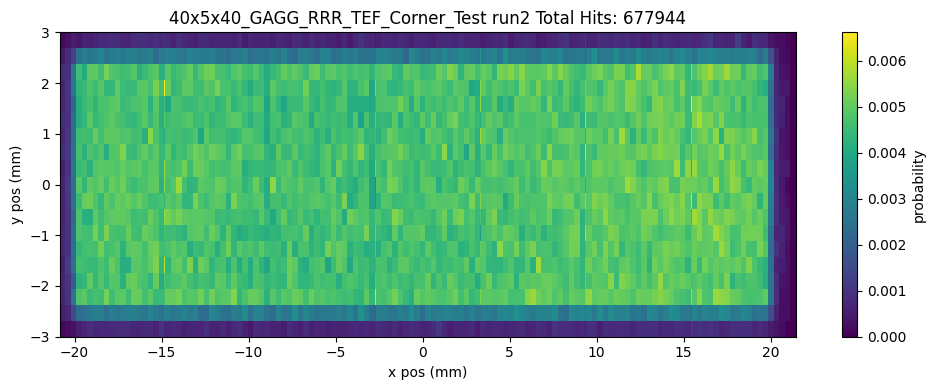

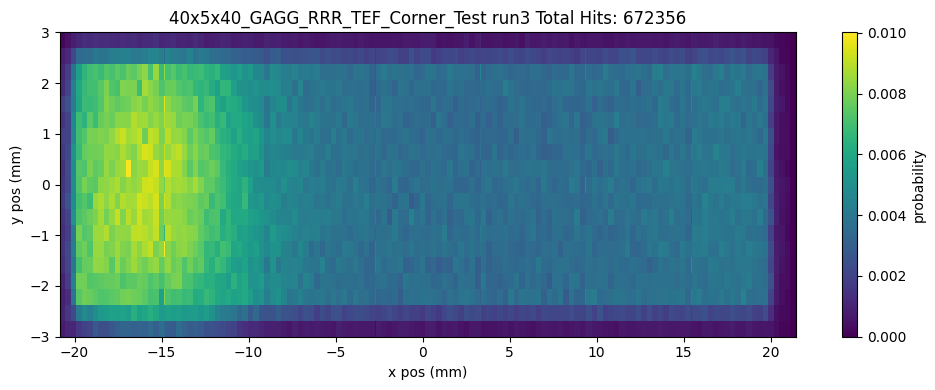

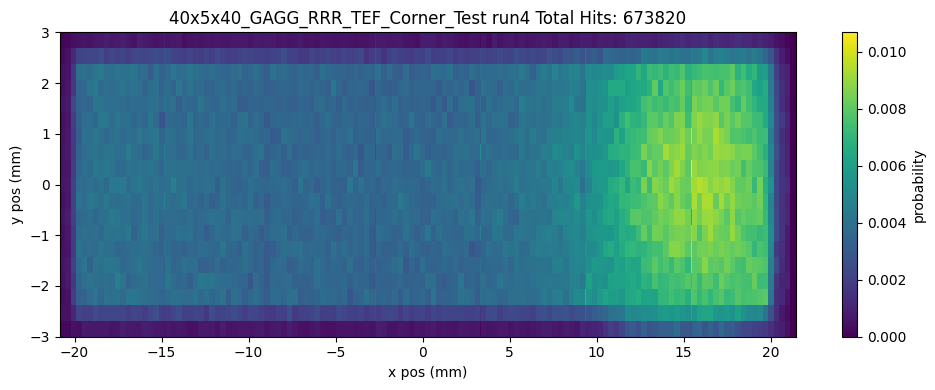

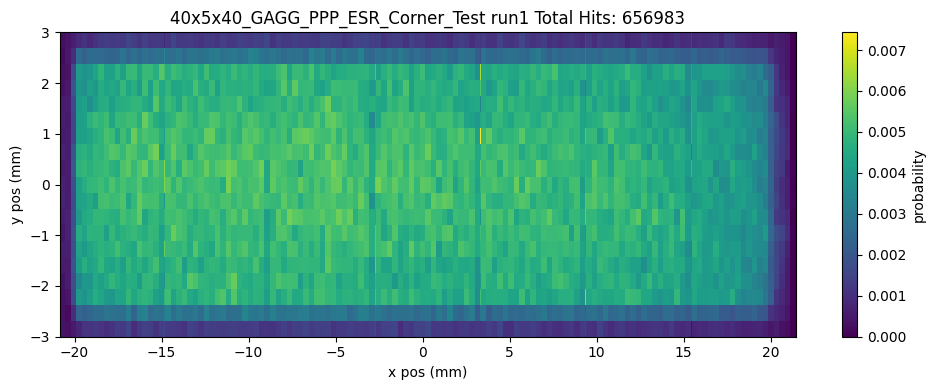

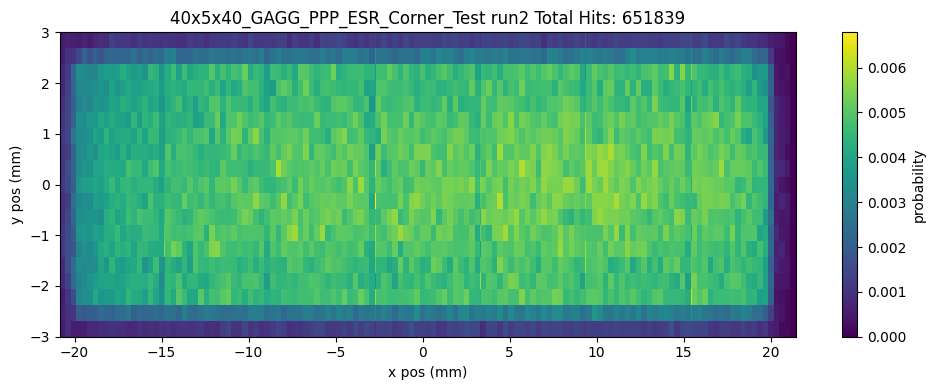

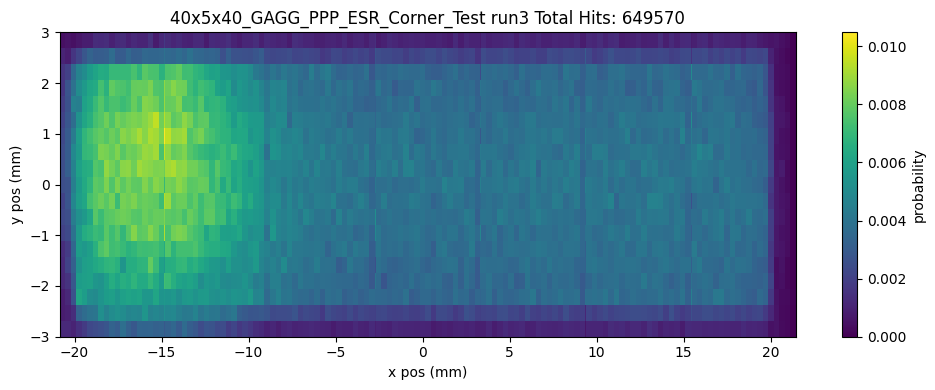

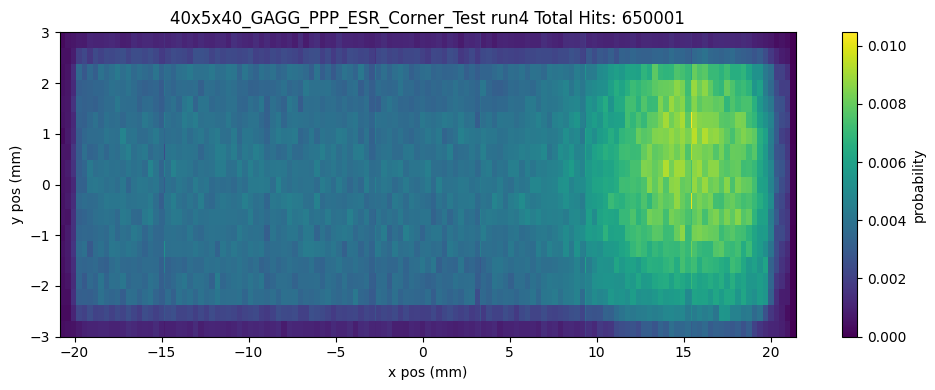

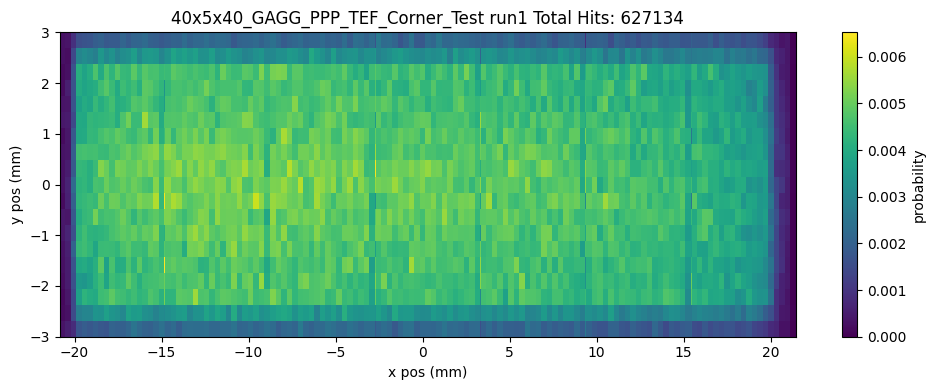

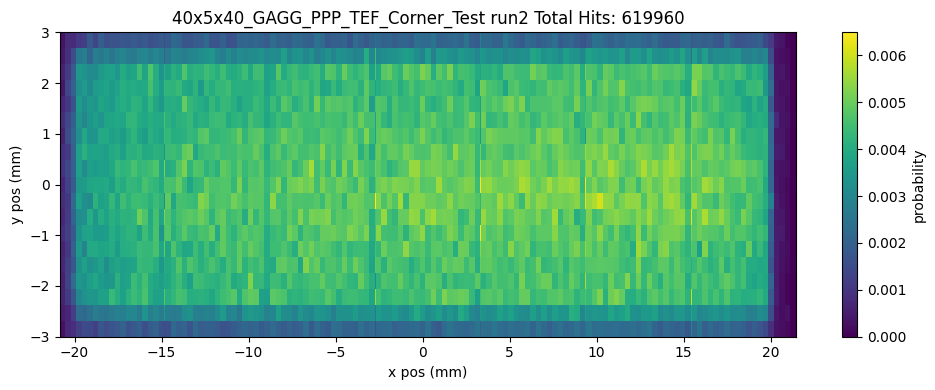

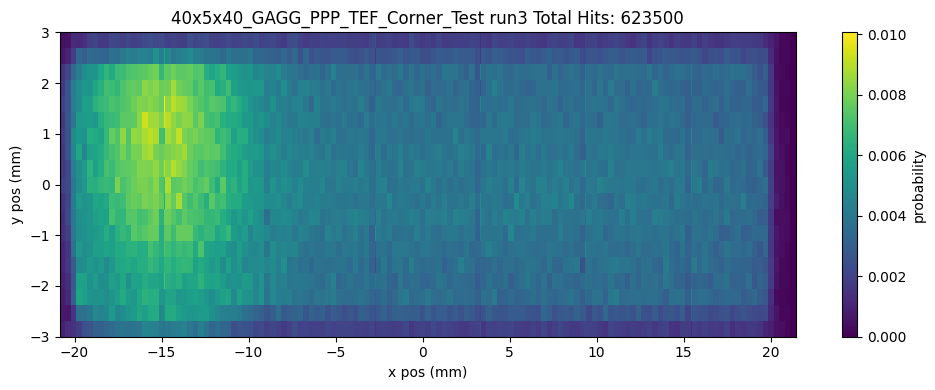

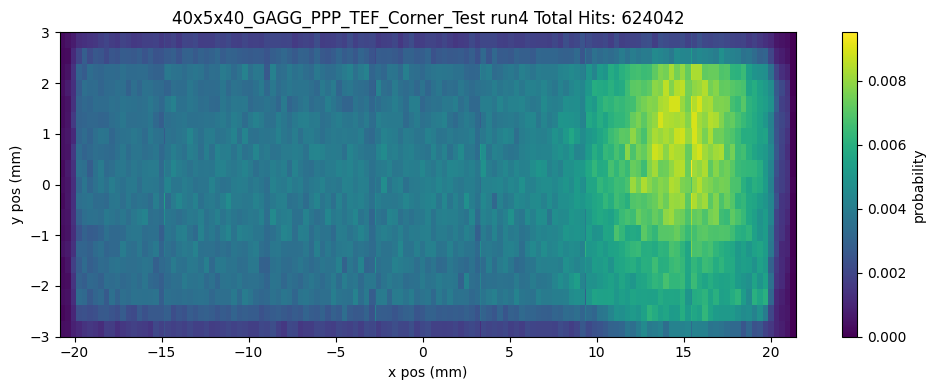

In [6]:
for fold in dirorder:
    splitname = fold.split('-')[0]
    add = fold.split('-')[1]
    total_hits = soh.calc_tot_sipm_hits(path_corners + "/" + fold + '/sipm-out.tab')
    title = splitname + " " + add + " Total Hits: " + total_hits
    hg, xe, ye = sph.twod_hist_sipm_positions(path_corners + "/" + fold)
    fig, ax = sph.plot_twod_sipm_histogram(xe, ye, hg, title)
    fig.savefig(splitname + "_2DHIST", dpi=300)
    sph.plt.show()
